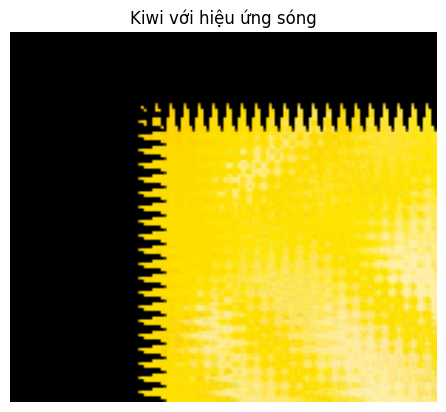

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
import cv2

# Đọc ảnh gốc
img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# --- Bước 1: Cắt vùng quả kiwi ---
# Cần xác định vùng quả kiwi (tọa độ có thể thay đổi theo ảnh cụ thể)
# Giả sử quả kiwi nằm ở tọa độ [100:200, 200:300]
kiwi = img[100:200, 200:300]

# --- Bước 2: Tịnh tiến ảnh 50px sang phải, 30px xuống dưới ---
M = np.float32([[1, 0, 50], [0, 1, 30]])
shifted_kiwi = cv2.warpAffine(kiwi, M, (kiwi.shape[1] + 50, kiwi.shape[0] + 30))

# --- Bước 3: Áp dụng hiệu ứng sóng ---
def apply_wave_effect(image, amplitude=5, frequency=0.2):
    rows, cols = image.shape[:2]
    
    # Tạo lưới tọa độ gốc
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # Biến đổi tọa độ theo hàm sin
    X_new = X + amplitude * np.sin(2 * np.pi * Y * frequency)
    Y_new = Y + amplitude * np.sin(2 * np.pi * X * frequency)
    
    # Chuẩn bị ảnh đầu ra
    if image.ndim == 3:
        # Áp dụng map_coordinates cho từng kênh màu
        warped = np.zeros_like(image)
        for i in range(3):
            warped[:, :, i] = map_coordinates(image[:, :, i], [Y_new, X_new], order=1, mode='reflect')
    else:
        warped = map_coordinates(image, [Y_new, X_new], order=1, mode='reflect')
    
    return warped

# Áp dụng hiệu ứng sóng
wave_kiwi = apply_wave_effect(shifted_kiwi)

# --- Bước 4: Lưu và hiển thị kết quả ---
iio.imwrite('kiwi_wave.jpg', wave_kiwi)

plt.imshow(wave_kiwi)
plt.axis('off')
plt.title('Kiwi với hiệu ứng sóng')
plt.show()


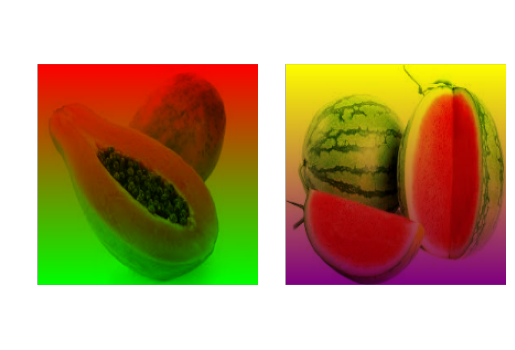

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2

def apply_vertical_gradient(image, start_color, end_color):
    """
    Áp dụng gradient màu theo chiều dọc từ start_color đến end_color.
    """
    h, w = image.shape[:2]
    gradient = np.zeros((h, 1, 3), dtype=np.uint8)
    for i in range(3):  # RGB channels
        gradient[:, 0, i] = np.linspace(start_color[i], end_color[i], h)

    # Lặp gradient theo chiều ngang và nhân với ảnh gốc (đã chuẩn hóa)
    gradient_full = np.repeat(gradient, w, axis=1)
    image_float = image.astype(np.float32) / 255.0
    result = (gradient_full.astype(np.float32) * image_float).astype(np.uint8)
    return result

def add_alpha(image):
    """
    Thêm alpha channel (255: không trong suốt) vào ảnh RGB.
    """
    h, w = image.shape[:2]
    alpha = np.ones((h, w), dtype=np.uint8) * 255
    rgba = np.dstack((image, alpha))
    return rgba

# Đọc ảnh đu đủ và dưa hấu
papaya = iio.imread('dudu.jpg')       
watermelon = iio.imread('duahau.jpg') 

# Resize về cùng kích thước (nếu cần)
papaya = cv2.resize(papaya, (200, 200))
watermelon = cv2.resize(watermelon, (200, 200))

# Áp dụng gradient
papaya_grad = apply_vertical_gradient(papaya, [255, 0, 0], [0, 255, 0])         # đỏ -> xanh lá
watermelon_grad = apply_vertical_gradient(watermelon, [255, 255, 0], [128, 0, 128])  # vàng -> tím

# Thêm alpha
papaya_rgba = add_alpha(papaya_grad)
watermelon_rgba = add_alpha(watermelon_grad)

# Tạo nền trong suốt để ghép 2 ảnh
canvas_h, canvas_w = 300, 450
canvas = np.zeros((canvas_h, canvas_w, 4), dtype=np.uint8)  # RGBA

# Dán đu đủ bên trái, dưa hấu bên phải
canvas[50:250, 25:225] = papaya_rgba
canvas[50:250, 250:450] = watermelon_rgba

# Lưu kết quả
iio.imwrite('dua_dudu_gradient.png', canvas)

# Hiển thị kết quả
plt.imshow(canvas)
plt.axis('off')
plt.show()


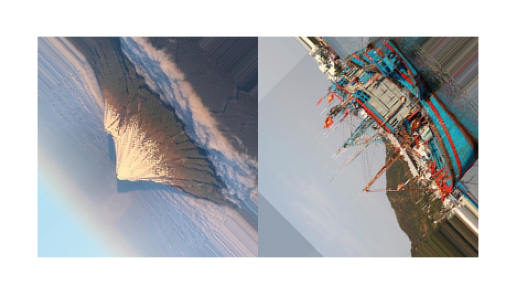

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import rotate

# Đọc ảnh núi và thuyền
mountain = iio.imread('nui.jpg')
boat = iio.imread('thuyen.jpg')

# Resize ảnh để dễ xử lý nếu cần
mountain = cv2.resize(mountain, (200, 200))
boat = cv2.resize(boat, (200, 200))

# --- Bước 1: Xoay 45 độ (giữ nguyên kích thước)
mountain_rotated = rotate(mountain, angle=45, reshape=False, mode='nearest')
boat_rotated = rotate(boat, angle=45, reshape=False, mode='nearest')

# Chuyển về uint8 nếu bị float
mountain_rotated = np.clip(mountain_rotated, 0, 255).astype(np.uint8)
boat_rotated = np.clip(boat_rotated, 0, 255).astype(np.uint8)

# --- Bước 2: Hiệu ứng phản chiếu dọc (vertical mirror)
mountain_mirrored = np.flipud(mountain_rotated)
boat_mirrored = np.flipud(boat_rotated)

# --- Bước 3: Ghép lên canvas trắng
canvas_h = 250
canvas_w = 450
canvas = np.ones((canvas_h, canvas_w, 3), dtype=np.uint8) * 255  # ảnh trắng

# Dán ảnh núi bên trái, thuyền bên phải
canvas[25:225, 25:225] = mountain_mirrored
canvas[25:225, 225:425] = boat_mirrored

# --- Bước 4: Lưu ảnh
iio.imwrite('mountain_boat_mirror.jpg', canvas)

# Hiển thị kết quả
plt.imshow(canvas)
plt.axis('off')
plt.show()


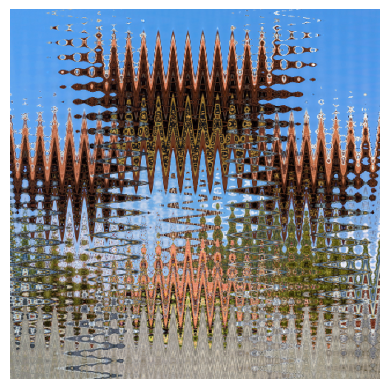

In [5]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import map_coordinates

# Bước 1: Đọc ảnh ngôi chùa
pagoda = iio.imread('chua.jpg')

# Resize nhỏ trước để tránh ảnh quá lớn khi phóng
pagoda = cv2.resize(pagoda, (100, 100))  # Resize tạm cho dễ quan sát

# Bước 2: Phóng to lên 5 lần
pagoda_scaled = cv2.resize(pagoda, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)

# Bước 3: Warping – hiệu ứng uốn cong theo hàm sin/cos
def warp_image(image, amplitude=30, frequency=0.05):
    h, w = image.shape[:2]
    X, Y = np.meshgrid(np.arange(w), np.arange(h))

    # Biến đổi tọa độ: uốn theo sóng sin trên trục Y
    X_new = X + amplitude * np.sin(2 * np.pi * Y * frequency)
    Y_new = Y + amplitude * np.cos(2 * np.pi * X * frequency)

    # Warping từng kênh màu
    warped = np.zeros_like(image)
    for i in range(3):
        warped[:, :, i] = map_coordinates(image[:, :, i], [Y_new, X_new], order=1, mode='reflect')
    return warped

# Áp dụng hiệu ứng uốn cong
pagoda_warped = warp_image(pagoda_scaled)

# Lưu ảnh kết quả
iio.imwrite('pagoda_warped.jpg', pagoda_warped)

# Hiển thị
plt.imshow(pagoda_warped)
plt.axis('off')
plt.show()
